# 07. SVC methods

In [1]:
import os
import scipy
import sklearn
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn.preprocessing import label_binarize

from IPython.display import display

In [2]:
data = './data/'
out = './out/'

# Bold print for Jupyter Notebook
b1 = '\033[1m'
b0 = '\033[0m'

### Just some matplotlib and seaborn parameter tuning

In [3]:
axistitlesize = 20
axisticksize = 17
axislabelsize = 26
axislegendsize = 23
axistextsize = 20
axiscbarfontsize = 15

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

# Colorpalettes, colormaps, etc.
sns.set_palette(palette='rocket')
rocket_cmap = sns.color_palette('rocket', as_cmap=True)

target_colors = np.array([cm.magma(0.5), cm.magma(0.75), cm.magma(0.93)])
feature_colors = np.array([rocket_cmap(0.17), cm.magma(0.45), cm.magma(0.60), cm.magma(0.75)])

## 1.) Linear SVC in case of linear separation

- load the Iris dataset (can be found in sklearn API)
- scale the data and plot the petal length vs petal width in a scatterplot colored with the target
- train an SVC model with linear kernel with default parameter settings, but once with C=1 and then C=1000
- visualize the model's decision boundary and the margins based on the coefficients learnt by the model
- interpret the results, what is the role of the C hyperparameter?

In [4]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [5]:
def scale_data(X):
    """
    Normalize the data to have zero mean and unit variance.
    
    Parameters:
    -----------
    X : ndarray or array-like in shape of (N, M)
        The unscaled dataset.
    
    Returns:
    --------
    X : ndarray in shape of (N, M)
        The already scaled dataset with zero mean and unit variance.
    """
    # Initialize
    scaler = StandardScaler()
    # Compute the mean and standard dev. and scale the dataset `X`
    X = scaler.fit_transform(X)

    return X

### 1./a. Load the Iris dataset and discover feature values

In [6]:
# Load iris values and labels
iris = load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
# Scale dataset
X = pd.DataFrame(scale_data(X), columns=features)

### I'm just testing, which plots are easier to read...
#### Default colors for `seaborn`'s `rocket` palette

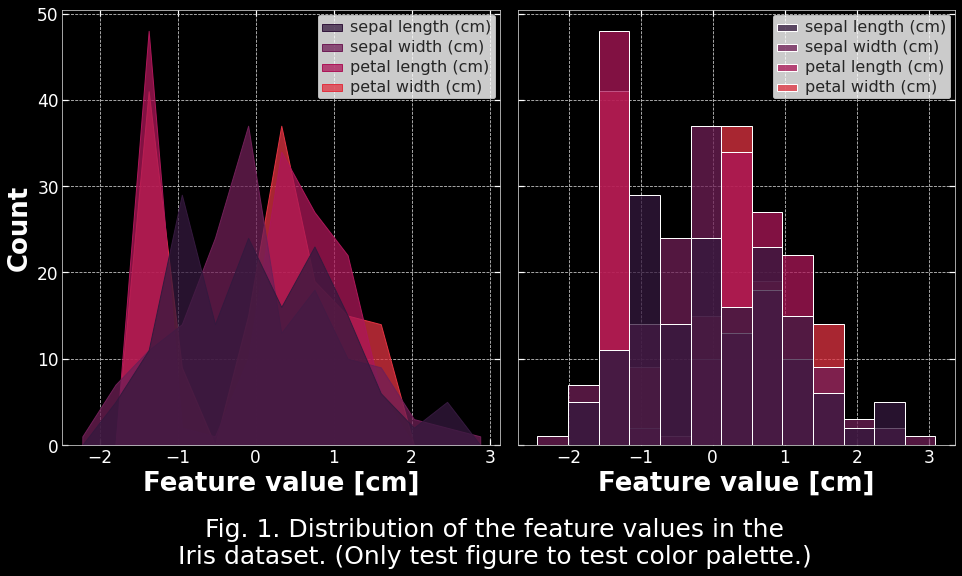

In [7]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*8,nrows*8),
                         sharey=True,
                         facecolor='black', subplot_kw={'facecolor' : 'black'})
fig.subplots_adjust(hspace=0.09, wspace=0.04)

# Visualization style of figure
methods = ['poly', 'bars']
for i, ax in enumerate(axes):
    sns.histplot(X, stat='count', element=methods[i], cumulative=False, common_bins=True,
                 ax=ax)
    ax.set_xlabel('Feature value [cm]', fontsize=axislabelsize, fontweight='bold', color='white')
    ax.set_ylabel('Count', fontsize=axislabelsize, fontweight='bold', color='white')
    ax.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

    plt.setp(ax.get_legend().get_texts(), fontsize=16) # for legend text

plt.suptitle('Fig. 1. Distribution of the feature values in the\n' +
             'Iris dataset. (Only test figure to test color palette.)',
             color='white',
             fontsize=axistitlesize+5, y=0.0)
    
plt.show()

#### Custom palette

/home/masterdesky/miniconda3/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
/home/masterdesky/miniconda3/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


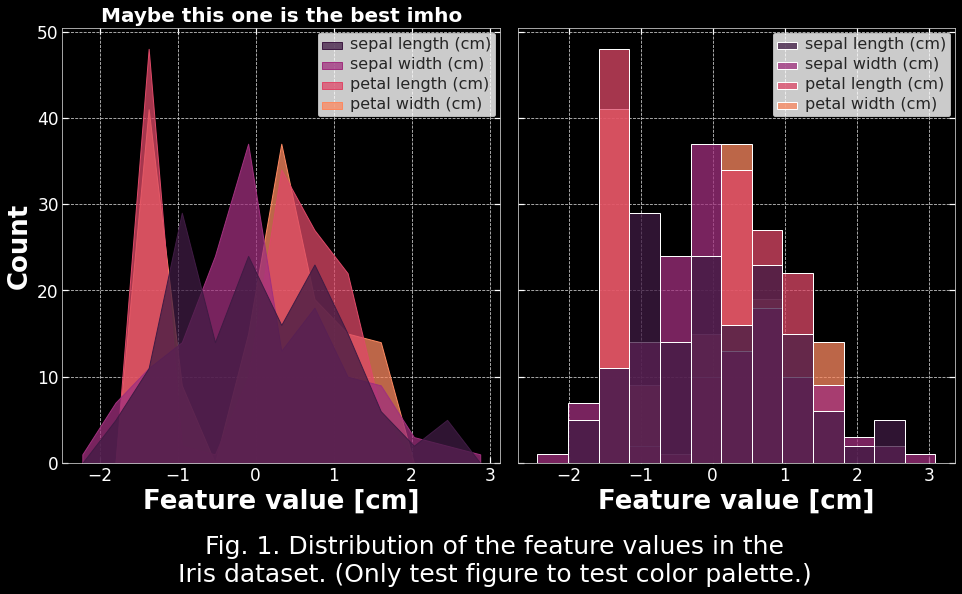

In [8]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*8,nrows*8),
                         sharey=True,
                         facecolor='black', subplot_kw={'facecolor' : 'black'})
fig.subplots_adjust(hspace=0.09, wspace=0.04)

# Visualization style of figure
methods = ['poly', 'bars']
for i, ax in enumerate(axes):
    sns.histplot(X, stat='count', element=methods[i], cumulative=False, common_bins=True,
                 palette=feature_colors,
                 ax=ax)
    ax.set_xlabel('Feature value [cm]', fontsize=axislabelsize, fontweight='bold', color='white')
    ax.set_ylabel('Count', fontsize=axislabelsize, fontweight='bold', color='white')
    ax.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

    plt.setp(ax.get_legend().get_texts(), fontsize=16) # for legend text

axes[0].set_title('Maybe this one is the best imho', fontsize=axistitlesize, fontweight='bold', color='white')

plt.suptitle('Fig. 1. Distribution of the feature values in the\n' +
             'Iris dataset. (Only test figure to test color palette.)',
             color='white',
             fontsize=axistitlesize+5, y=0.0)

plt.show()

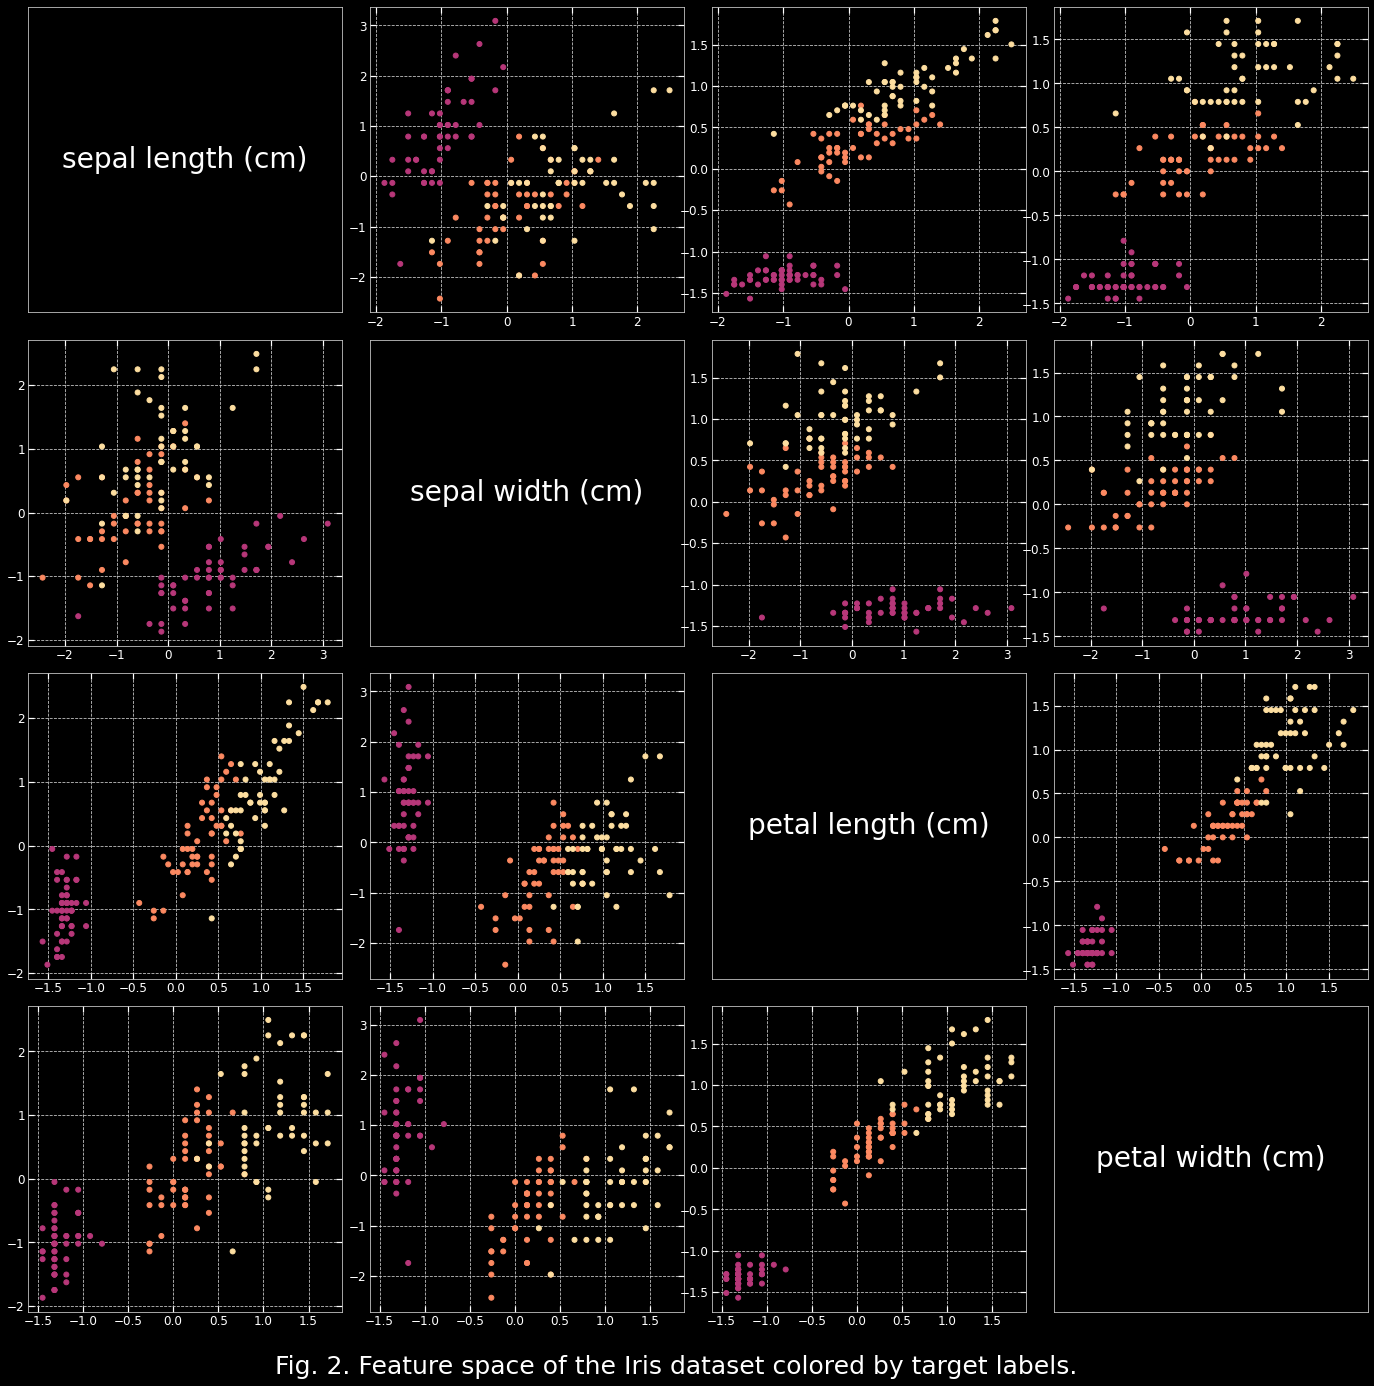

In [9]:
# Visualize iris dataset
nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*6, nrows*6),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})
fig.subplots_adjust(hspace=0.09, wspace=0.09)

sc = 5
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if i==j:
            ax.text(0.5, 0.5, features[i], color='white',
                    fontsize=28, ha='center', va='center')
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.scatter(X[features[i]], X[features[j]], s=sc**2,
                       color=target_colors[y])
            ax.tick_params(axis='both', which='major', labelsize=12, colors='white')

plt.suptitle('Fig. 2. Feature space of the Iris dataset colored by target labels.', color='white',
             fontsize=axistitlesize+5, y=0.1)
plt.show()

### 1./b. Fit the default SVC model from `sklearn`

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
def accuracy_metric(y_test, y_pred):
    """
    Calculate accuracy of model prediction.
    
    Parameters:
    -----------
    y_test : array-like of shape (N, )
        Original labels of the test dataset.
    
    y_pred : array-like of shape (N, )
        Predicted labels of the test dataset.
    
    Returns:
    --------
    Accuracy of model in reference of the true test labels.
    """
    # Binarize labels
    y_test = label_binarize(y_test, classes=np.unique(y_test))
    y_pred = label_binarize(y_pred, classes=np.unique(y_pred))

    correct = 0
    for (t, p) in zip(y_test, y_pred):
        if all(t == p):
            correct += 1
    return correct / len(y_test) * 100

In [12]:
def plot_confusion_matrix(conf_mat, y, labels=None, title=None):
    """
    Plots a confusion matrix
    """
    fig, axes = plt.subplots(figsize=(10,10))
    axes.set_aspect('equal')

    im = axes.imshow(conf_mat)
    # Loop over data dimensions and create text annotations.
    for X in range(conf_mat.shape[0]):
        for Y in range(conf_mat.shape[1]):
            axes.text(Y, X, conf_mat[X, Y], fontsize=30,
                      ha='center', va='center', color='white', fontweight='bold', 
                      bbox=dict(color=np.array((0,0,0,0.2)), lw=0)
                     )

    # Set axis tick locations and labels
    ticks = [i for i in range(len(set(y)))]
    if labels is None:
        ticklabels = [i+1 for i in range(len(set(y)))]
    else:
        ticklabels = list(labels)

    axes.set_xticks(ticks)
    axes.set_xticklabels(ticklabels)
    axes.set_yticks(ticks)
    axes.set_yticklabels(ticklabels)

    axes.set_xlabel('Predicted labels', fontsize=axislabelsize+5, fontweight='bold')
    axes.set_ylabel('True labels', fontsize=axislabelsize+5, fontweight='bold')
    axes.tick_params(axis='both', which='major', labelsize=axisticksize+5)
    axes.xaxis.tick_top()
    axes.xaxis.set_label_position('top') 

    axes.grid(False)

    # Create an axis on the right side of `axes`. The width of `cax` will be 5%
    # of `axes` and the padding between `cax` and axes will be fixed at 0.1 inch
    divider = make_axes_locatable(axes)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    cbar = plt.colorbar(mappable=im, cax=cax)
    cbar.ax.tick_params(labelsize=axiscbarfontsize, colors='black')
    cbar.set_label('Number of occurences', fontsize=axiscbarfontsize+10, labelpad=15, rotation=90)

    plt.suptitle(title,
                 fontsize=axistitlesize+5, y=0.1)

    plt.show()

#### SVC with regularization parameter `C`=1

In [13]:
# Define and fit the SVC model with C=1 and linear kernel
svc = SVC(C=1, kernel='linear')
svc.fit(X, y);
# Make predictions
y_pred = svc.predict(X)
# Calculate and accuracy metric and the confusion matrix
accuracy = accuracy_metric(y_test=y, y_pred=y_pred)
conf_mat = confusion_matrix(y, y_pred)

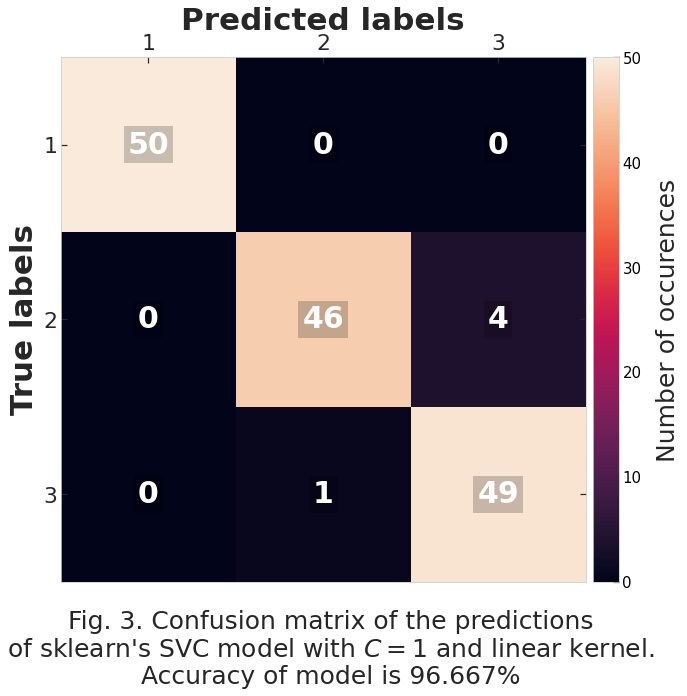

In [14]:
plot_confusion_matrix(conf_mat, y,
                      title=('Fig. 3. Confusion matrix of the predictions\nof sklearn\'s SVC model with $C=1$ and linear kernel.\n' +
                             'Accuracy of model is {0:.3f}%'.format(accuracy)))

#### SVC with regularization parameter `C`=1000

In [15]:
# Define and fit the SVC model with C=1000 and linear kernel
svc = SVC(C=1000, kernel='linear')
svc.fit(X, y);
# Make predictions
y_pred = svc.predict(X)
# Calculate and accuracy metric and the confusion matrix
accuracy = accuracy_metric(y_test=y, y_pred=y_pred)
conf_mat = confusion_matrix(y, y_pred)

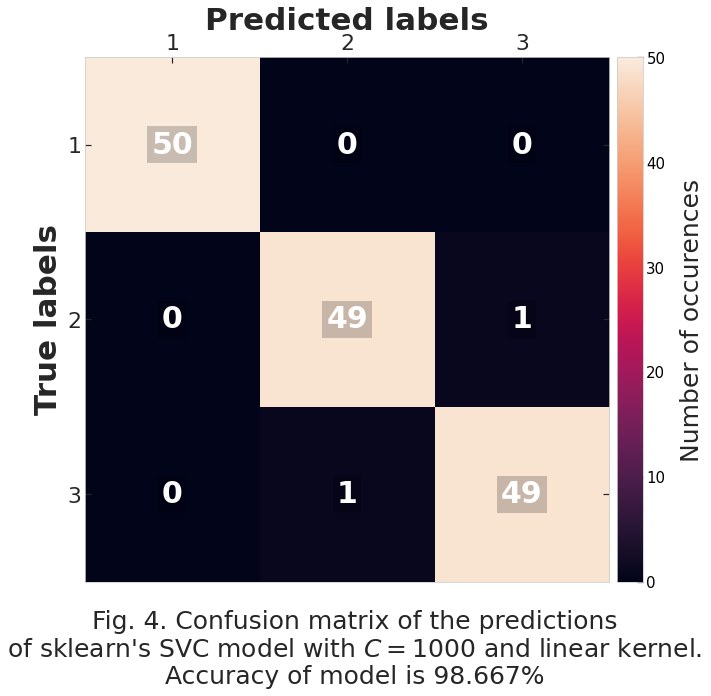

In [16]:
plot_confusion_matrix(conf_mat, y,
                      title=('Fig. 4. Confusion matrix of the predictions\nof sklearn\'s SVC model with $C=1000$ and linear kernel.\n' +
                             'Accuracy of model is {0:.3f}%'.format(accuracy)))

### 1./c. Plotting decision boundary using fit coefficients learned by the model

#### Source used
- https://stackoverflow.com/questions/51297423/plot-scikit-learn-sklearn-svm-decision-boundary-surface

In [17]:
def make_meshgrid(X_i, X_j, h=200):
    
    xi_min, xi_max = X_i.min() - 1, X_i.max() + 1
    xj_min, xj_max = X_j.min() - 1, X_j.max() + 1
    xx, yy = np.meshgrid(np.linspace(xi_min, xi_max, h),
                         np.linspace(xj_min, xj_max, h),
                         copy=True)
    return xx, yy

def plot_contours(ax, svc, xx, yy, i, j, **kwargs):
    xx_f, yy_f = xx.ravel(), yy.ravel()
    X_pred = np.zeros((xx_f.shape[0], svc.shape_fit_[1]))
    X_pred[:, i], X_pred[:, j] = xx_f, yy_f
    #W = svc.coef_[:,(i,j)]
    #Z = np.sum((np.dot(np.c_[xx_f, yy_f], W.T) + svc.intercept_ < 0), axis=1)
    Z = svc.predict(X_pred)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, **kwargs)

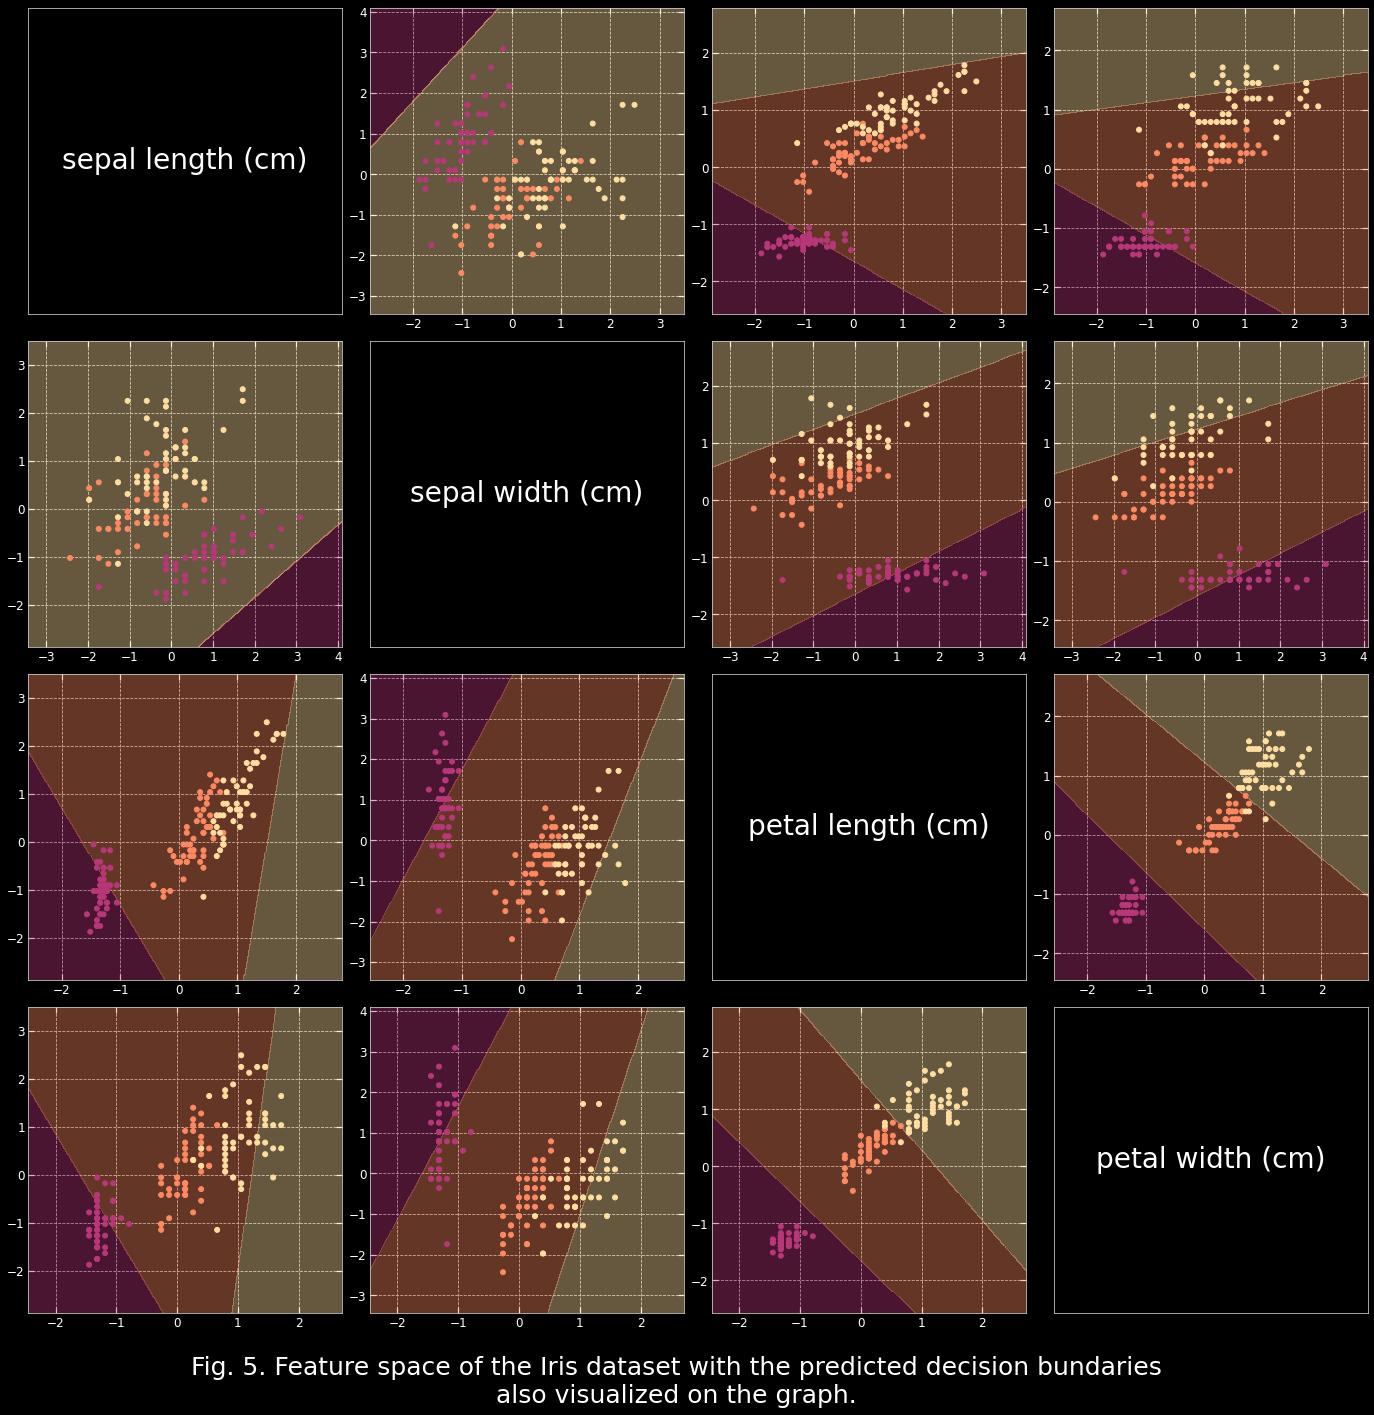

In [18]:
# Visualize iris dataset
nrows = 4
ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*6, nrows*6),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})
fig.subplots_adjust(hspace=0.09, wspace=0.09)

sc = 5
for i in range(nrows):
    for j in range(ncols):
        ax = axes[i][j]
        if i==j:
            ax.text(0.5, 0.5, features[i], color='white',
                    fontsize=28, ha='center', va='center')
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            # Set-up grid for plotting
            X_i, X_j = X[features[i]], X[features[j]]
            xx, yy = make_meshgrid(X_i, X_j, h=300)
            plot_contours(ax, svc, xx, yy, i, j, levels=2, colors=target_colors, alpha=0.4)
            ax.scatter(X_i, X_j, s=sc**2,
                       color=target_colors[y])
            ax.tick_params(axis='both', which='major', labelsize=12, colors='white')

plt.suptitle('Fig. 5. Feature space of the Iris dataset with the predicted decision bundaries\n' +
             'also visualized on the graph.',
             color='white',
             fontsize=axistitlesize+5, y=0.1)
plt.show()

## 2.) Linear SVC but non-linear separation

- create a dataset with the following: X, y = sklearn.datasets.make_moons(noise=0.1, random_state=0)
- perform the same steps just as in the previous exercise and use the linear kernel for  the SVC
- since linear SVC cannot do non-linear separation, you will need to do some workaround, for example adding polynomial features (3rd order would be a good choice)
- write down with your own words in few sentences how the support vector machine works 

In [19]:
gen_feature_colors = np.array([rocket_cmap(0.25), cm.magma(0.75)])

### 2./a. Generate dataset and perfrom same steps as above

In [20]:
X, y = sklearn.datasets.make_moons(noise=0.1, random_state=0)
# Scale dataset (Should I??)
#X = scale_data(X)

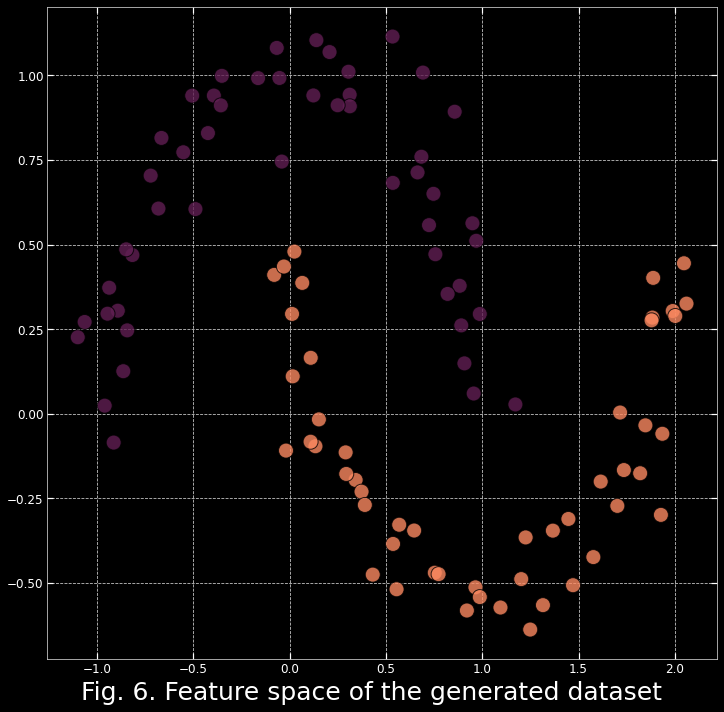

In [21]:
# Visualize iris dataset
fig, axes = plt.subplots(figsize=(12, 12),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

sc = 15
axes.scatter(X[:, 0], X[:, 1], s=sc**2,
           color=gen_feature_colors[y], ec='k', alpha=0.8)
axes.tick_params(axis='both', which='major', labelsize=12, colors='white')

plt.suptitle('Fig. 6. Feature space of the generated dataset', color='white',
             fontsize=axistitlesize+5, y=0.1)
plt.show()

/home/masterdesky/miniconda3/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:
/home/masterdesky/miniconda3/lib/python3.8/site-packages/seaborn/_core.py:163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if palette in QUAL_PALETTES:


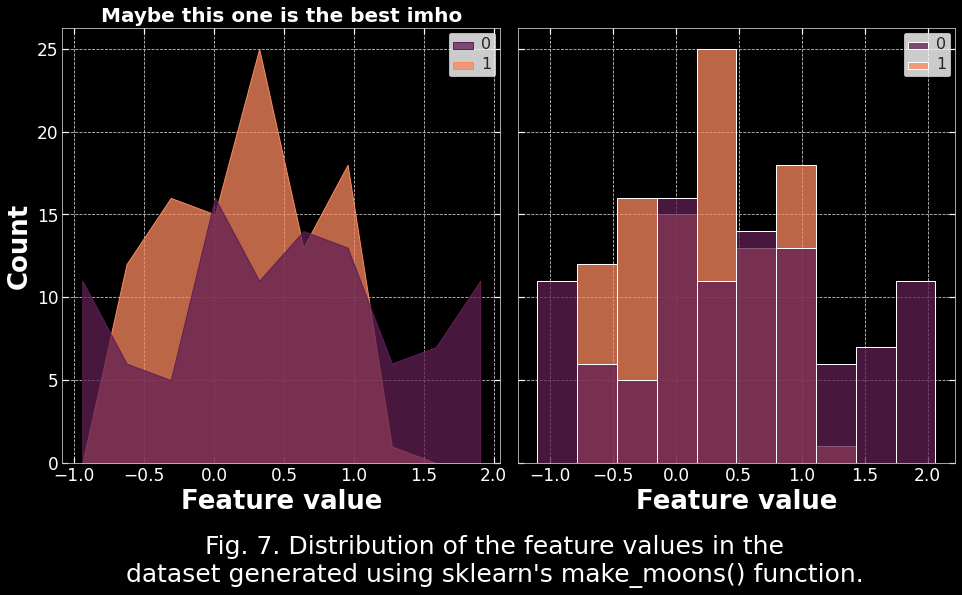

In [22]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*8,nrows*8),
                         sharey=True,
                         facecolor='black', subplot_kw={'facecolor' : 'black'})
fig.subplots_adjust(hspace=0.09, wspace=0.04)

# Visualization style of figure
methods = ['poly', 'bars']
for i, ax in enumerate(axes):
    sns.histplot(X, stat='count', element=methods[i], cumulative=False, common_bins=True,
                 palette=gen_feature_colors,
                 ax=ax)
    ax.set_xlabel('Feature value', fontsize=axislabelsize, fontweight='bold', color='white')
    ax.set_ylabel('Count', fontsize=axislabelsize, fontweight='bold', color='white')
    ax.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

    plt.setp(ax.get_legend().get_texts(), fontsize=16) # for legend text

axes[0].set_title('Maybe this one is the best imho', fontsize=axistitlesize, fontweight='bold', color='white')

plt.suptitle('Fig. 7. Distribution of the feature values in the\n' +
             'dataset generated using sklearn\'s make_moons() function.',
             color='white',
             fontsize=axistitlesize+5, y=0.0)

plt.show()

#### SVC with regularization parameter `C`=1

In [23]:
# Define and fit the SVC model with C=1 and linear kernel
svc = SVC(C=1, kernel='linear')
svc.fit(X, y);
# Make predictions
y_pred = svc.predict(X)
# Calculate and accuracy metric and the confusion matrix
accuracy = accuracy_metric(y_test=y, y_pred=y_pred)
conf_mat = confusion_matrix(y, y_pred, labels=[1,0])

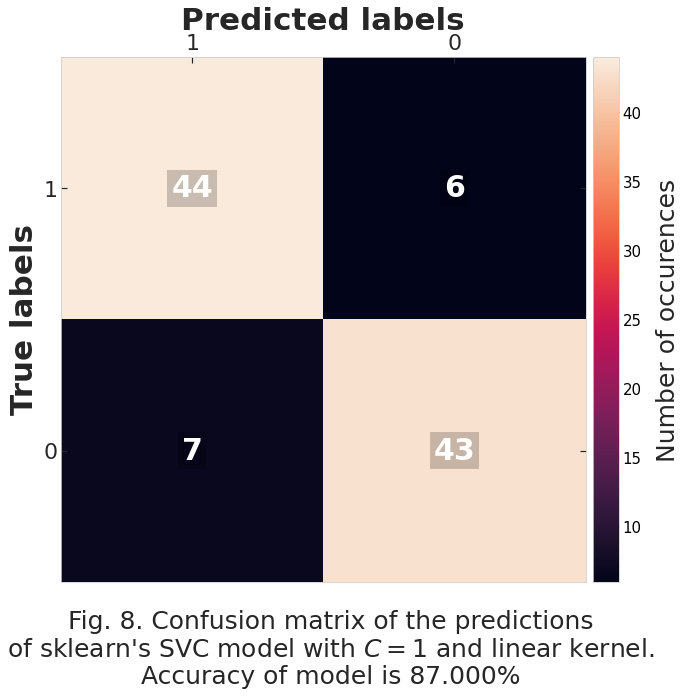

In [24]:
plot_confusion_matrix(conf_mat, y, labels=[1,0],
                      title=('Fig. 8. Confusion matrix of the predictions\nof sklearn\'s SVC model with $C=1$ and linear kernel.\n' +
                             'Accuracy of model is {0:.3f}%'.format(accuracy)))

#### SVC with regularization parameter `C`=1000

In [25]:
# Define and fit the SVC model with C=1000 and linear kernel
svc = SVC(C=1000, kernel='linear')
svc.fit(X, y);
# Make predictions
y_pred = svc.predict(X)
# Calculate and accuracy metric and the confusion matrix
accuracy = accuracy_metric(y_test=y, y_pred=y_pred)
conf_mat = confusion_matrix(y, y_pred, labels=[1,0])

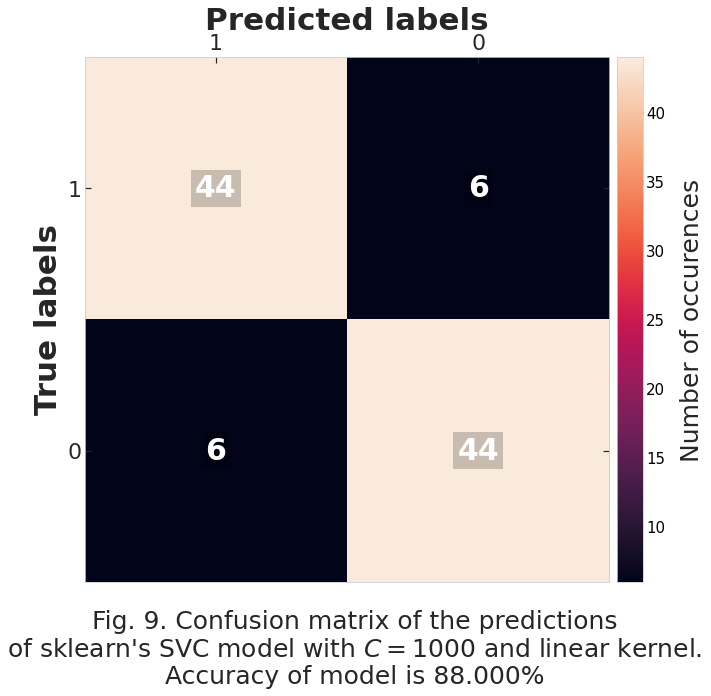

In [26]:
plot_confusion_matrix(conf_mat, y, labels=[1,0],
                      title=('Fig. 9. Confusion matrix of the predictions\nof sklearn\'s SVC model with $C=1000$ and linear kernel.\n' +
                             'Accuracy of model is {0:.3f}%'.format(accuracy)))

In [27]:
def make_meshgrid(x, y, off=0.5, h=200):
    x_min, x_max = x.min() - off, x.max() + off
    y_min, y_max = y.min() - off, y.max() + off
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, h), np.linspace(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **kwargs):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **kwargs)
    return out

In [28]:
X_i, X_j = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X_i, X_j, off=0.25, h=500)

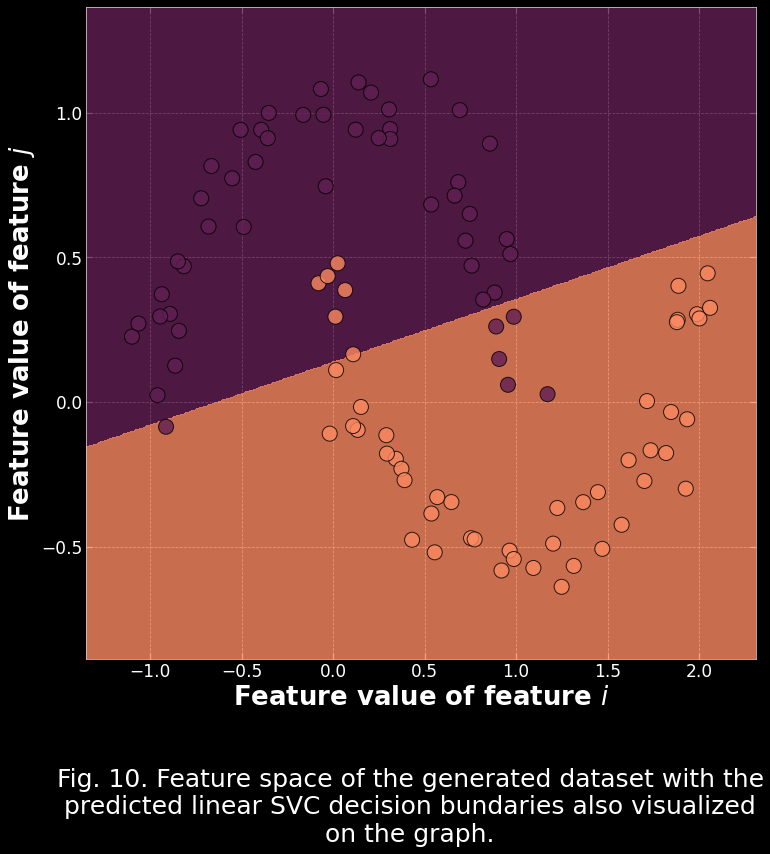

In [29]:
fig, axes = plt.subplots(figsize=(12,12),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

sc = 15
plot_contours(axes, svc, xx, yy, levels=1, colors=gen_feature_colors, alpha=0.8)
axes.scatter(X_i, X_j, color=gen_feature_colors[y], s=sc**2,
             ec='k', alpha=0.8)

axes.set_xlabel('Feature value of feature $i$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('Feature value of feature $j$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

plt.suptitle('Fig. 10. Feature space of the generated dataset with the\n' +
             'predicted linear SVC decision bundaries also visualized\n' +
             'on the graph.',
             color='white',
             fontsize=axistitlesize+5, y=0.0)

plt.show()

### 2./b. Add polynomial features to the pipeline

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score

In [31]:
# Fit from sklearn's documentation
# https://scikit-learn.org/0.23/auto_examples/model_selection/plot_underfitting_overfitting.html
pipeline = Pipeline([("polynomial_features", PolynomialFeatures(degree=3, include_bias=False)),
                     ("svc", SVC(C=1000.0, kernel='linear'))])
# Transform X for the PolynomialFeatures() and LinearRegression() class
# Then fit on the pipeline the available data
pipeline.fit(X, y)
# Evaluate the models using crossvalidation
scores = cross_val_score(pipeline, X, y,
                         scoring="neg_mean_squared_error", cv=10)

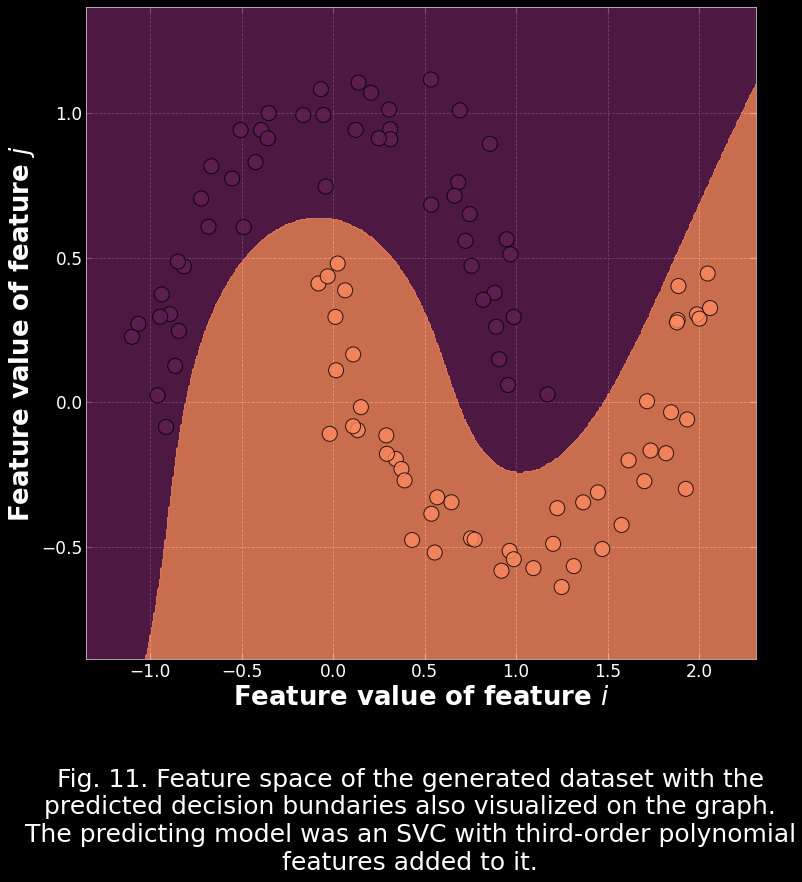

In [32]:
fig, axes = plt.subplots(figsize=(12,12),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

sc = 15
plot_contours(axes, pipeline, xx, yy, levels=1, colors=gen_feature_colors, alpha=0.8)
axes.scatter(X_i, X_j, color=gen_feature_colors[y], s=sc**2,
             ec='k', alpha=0.8)

axes.set_xlabel('Feature value of feature $i$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('Feature value of feature $j$', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

plt.suptitle('Fig. 11. Feature space of the generated dataset with the\n' +
             'predicted decision bundaries also visualized on the graph.\n' +
             'The predicting model was an SVC with third-order polynomial\n' +
             'features added to it.',
             color='white',
             fontsize=axistitlesize+5, y=0.0)

plt.show()

### 2./c. How do support vector machines work?

ASD

## 3.) Load the dataset from 2 weeks ago and build/evaluate the SVC with default settings

Reminder:
- you need to build a classifier that predicts the probability of a sample coming from a cancerous (tumor type is normal or not) person based on the measured protein levels
- train the SVM classifier (SVC in sklearn API) on every second sample (not first 50% of the data (!), use every second line)
- generate prediction for the samples that were not used during the training

To-do now:
- build default SVC, but set it to predict probabilities
- plot the ROC curve and calculate the confusion matrix for the predictions
- do the same for the CancerSEEK predictions and compare your model's performance to CancerSEEK performance (as a reference, plot it on the same figure)
- how good is the performance of the new model?

### 3./a. Load the preprocess dataset from the 5th homework

I won't copy the whole preprocessing pipeline here, but I'll only save the processed dataset into a file and load that from here for further use.

In [33]:
os.listdir(data)

['final_df.csv']

In [34]:
df = pd.read_csv(data + 'final_df.csv', index_col=0)

In [35]:
display(df.head())
display(df.tail())

,Tumor type,AJCC Stage,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),...,SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result,Cancerous
0,2,1.0,1583.450,5598.50,3621.04,5.090,19.08,16.452,9.81,540.07,...,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,0.938342,1,1
1,2,1.0,715.308,20936.35,2772.96,7.270,10.04,40.910,27.57,5902.43,...,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,0.925363,1,1
2,2,2.0,4365.530,2350.93,4120.77,4.854,16.96,16.452,14.59,973.75,...,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,0.852367,0,1
3,2,2.0,715.308,1604.34,2029.96,5.390,8.31,16.452,7.78,2027.53,...,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,0.617639,0,1
4,2,2.0,801.300,2087.57,2069.17,4.854,11.73,16.452,12.21,614.49,...,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,0.318434,0,1


,Tumor type,AJCC Stage,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),...,SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml),CancerSEEK Logistic Regression Score,CancerSEEK Test Result,Cancerous
1812,7,1.0,879.498,1484.70,2096.76,24.82,10.30,42.39,14.92,914.00,...,115.24,5390.31,8538.58,16.89,599.40,167799.61,50128.60,0.980312,1,1
1813,7,1.0,1337.330,1607.90,852.37,5.58,9.80,16.44,12.32,1179.51,...,147.17,7951.03,12966.19,16.89,599.40,123443.76,54066.98,0.999995,1,1
1814,7,3.0,879.498,1592.84,1044.45,30.48,8.48,16.44,8.26,443.01,...,104.63,2396.36,1901.41,16.89,599.40,104070.89,39844.02,1.000000,1,1
1815,7,2.0,879.498,5267.95,1445.69,1469.45,23.74,62.26,16.53,443.01,...,73.55,3079.81,5312.90,16.89,6864.33,110579.24,42921.13,1.000000,1,1
1816,7,3.0,879.498,3546.43,1493.32,1428.31,836.85,37.90,13.78,443.01,...,72.22,3967.55,4045.18,16.89,12877.10,88464.04,47219.24,1.000000,1,1


### 3./b. SVC model to predict cancerous samples

In [36]:
# Full dataset
X = df[df.columns[2:-3]]
y = df[df.columns[-1]]

# Train-test split as given by task description
X_train, X_test = X[::2], X[1::2]
y_train, y_test = y[::2], y[1::2]

#### SVC with regularization parameter `C`=1

In [37]:
# Define and fit the SVC model with C=1
svc = SVC(C=1)
svc.fit(X_train, y_train);
# Make predictions
y_pred = svc.predict(X_test)
# Calculate and accuracy metric and the confusion matrix
accuracy = accuracy_metric(y_test=y_test, y_pred=y_pred)
conf_mat = confusion_matrix(y_test, y_pred, labels=[1,0])

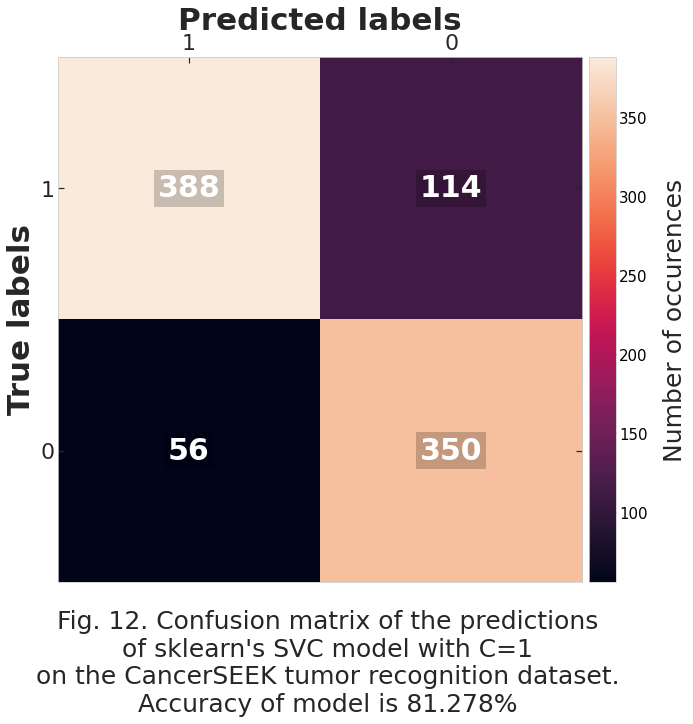

In [38]:
plot_confusion_matrix(conf_mat, y, labels=[1,0],
                      title=('Fig. 12. Confusion matrix of the predictions\nof sklearn\'s SVC model with C=1\n' +
                             'on the CancerSEEK tumor recognition dataset.\n' +
                             'Accuracy of model is {0:.3f}%'.format(accuracy)))

#### SVC with regularization parameter `C`=1000

In [39]:
# Define and fit the SVC model with C=1000
svc = SVC(C=1000)
svc.fit(X_train, y_train);
# Make predictions
y_pred = svc.predict(X_test)
# Calculate and accuracy metric and the confusion matrix
accuracy = accuracy_metric(y_test=y_test, y_pred=y_pred)
conf_mat = confusion_matrix(y_test, y_pred, labels=[1,0])

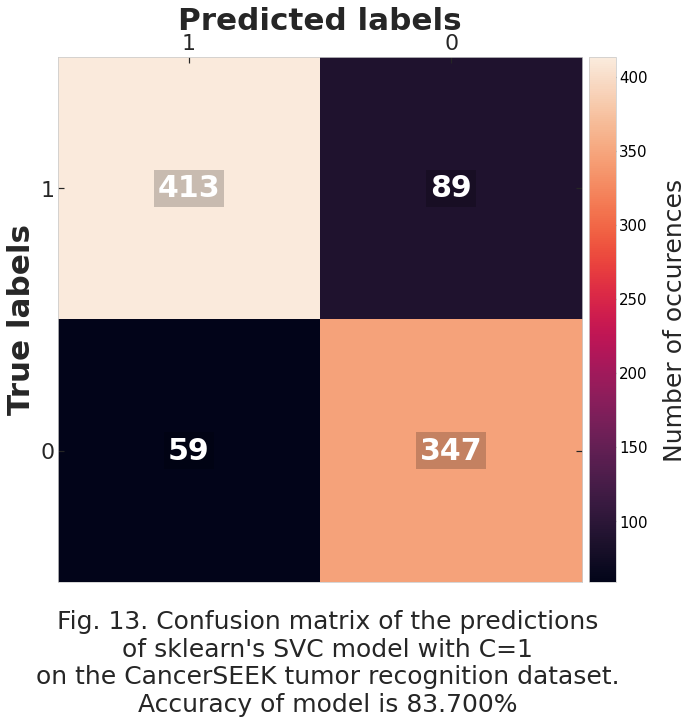

In [40]:
plot_confusion_matrix(conf_mat, y, labels=[1,0],
                      title=('Fig. 13. Confusion matrix of the predictions\nof sklearn\'s SVC model with C=1\n' +
                             'on the CancerSEEK tumor recognition dataset.\n' +
                             'Accuracy of model is {0:.3f}%'.format(accuracy)))

### 3./c. Plot ROC curve and confusion matrix of probabilistic predictions

In [41]:
from sklearn.metrics import roc_curve, auc

In [42]:
# Define and fit the SVC model with C=1 to predict probabilites
svc = SVC(probability=True)
svc.fit(X_train, y_train);
# Make predictions
y_pred = svc.predict(X_test)
# Calculate and accuracy metric and the confusion matrix
accuracy = accuracy_metric(y_test=y_test, y_pred=y_pred)
conf_mat = confusion_matrix(y_test, y_pred, labels=[1,0])

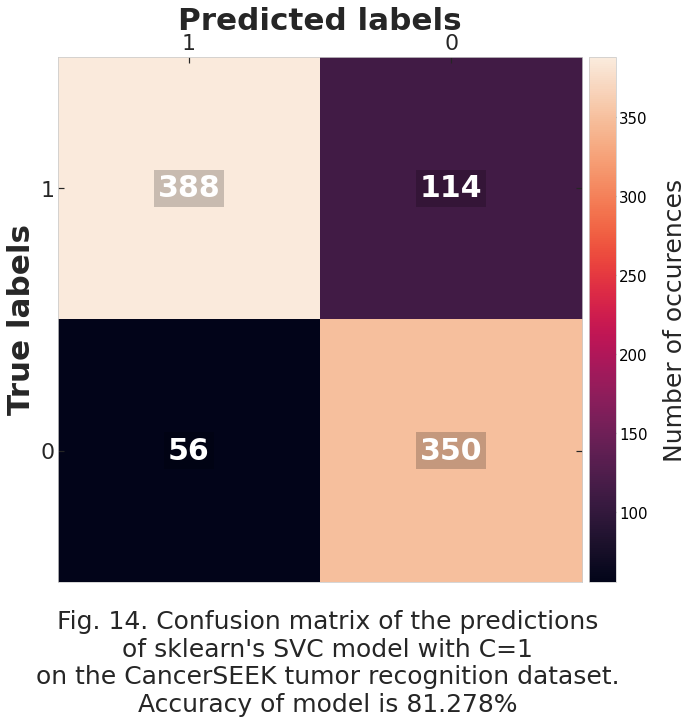

In [43]:
plot_confusion_matrix(conf_mat, y, labels=[1,0],
                      title=('Fig. 14. Confusion matrix of the predictions\nof sklearn\'s SVC model with C=1\n' +
                             'on the CancerSEEK tumor recognition dataset.\n' +
                             'Accuracy of model is {0:.3f}%'.format(accuracy)))

#### Create ROC curve

In [44]:
# Binarize labels
y = label_binarize(y, classes=np.unique(y))
y_test = np.array(y_test)[:, np.newaxis]
y_test_cS = np.array(df['CancerSEEK Test Result'])[1::2][:, np.newaxis]
n_classes = y.shape[1]

In [45]:
y_score = svc.fit(X_train, y_train).decision_function(X_test)
if n_classes == 1:
    y_score = y_score[:, np.newaxis]

In [46]:
def compute_roc(y_test, y_score, n_classes):
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    return fpr, tpr, roc_auc

In [47]:
fpr_my, tpr_my, roc_auc_my = compute_roc(y_test=y_test,
                                         y_score=y_score, n_classes=n_classes)
fpr_cS, tpr_cS, roc_auc_cS = compute_roc(y_test=y_test_cS,
                                         y_score=y_score, n_classes=n_classes)

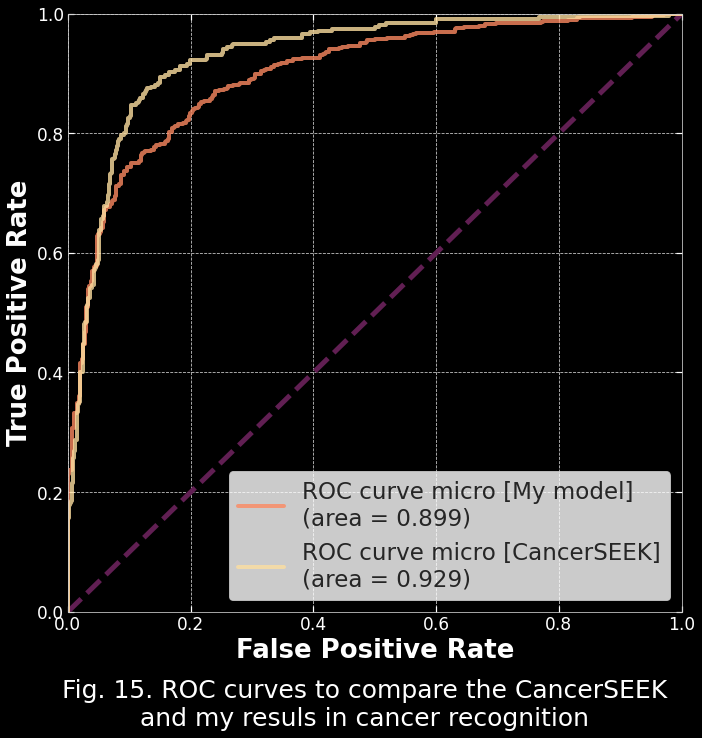

In [48]:
fig, axes = plt.subplots(figsize=(11, 11),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

axes.plot([0, 1], [0, 1], color=rocket_cmap(0.25), lw=5, linestyle='--')

# My model
axes.plot(fpr_my['micro'], tpr_my['micro'],
          label='ROC curve micro [My model]\n(area = %0.3f)' % roc_auc_my['micro'],
          color=cm.magma(0.75), lw=4, alpha=0.8)
# CancerSEEK
axes.plot(fpr_cS['micro'], tpr_cS['micro'],
          label='ROC curve micro [CancerSEEK]\n(area = %0.3f)' % roc_auc_cS['micro'],
          color=cm.magma(0.93), lw=4, alpha=0.8)

axes.set_xlim([0.0, 1.0])
axes.set_ylim([0.0, 1.0])

#ax.set_title('Tumor type : {0}'.format(tumor_dict[k+1]), fontsize=axistitlesize, fontweight='bold')
axes.set_xlabel('False Positive Rate', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('True Positive Rate', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

axes.legend(loc='lower right', fontsize=axislegendsize)

plt.suptitle('Fig. 15. ROC curves to compare the CancerSEEK\nand my resuls in cancer recognition',
             fontsize=axistitlesize+5, y=0.04, color='white')
    
plt.show()

## 4.) Scale data and try different kernels

- scale your data before applying the SVC model
- plot the ROC curve and calculate the confusion matrix for the predictions
- do your model perform better or worse after scaling? 
- try out other kernels (linear, poly) and evaluate the performance of the model the same way

### 4./a. Scale dataset and test results

In [49]:
# Full dataset
X = df[df.columns[2:-3]]
y = df[df.columns[-1]]
X = pd.DataFrame(scale_data(X), columns=X.columns)

# Train-test split as given by task description
X_train, X_test = X[::2], X[1::2]
y_train, y_test = y[::2], y[1::2]

#### SVC with regularization parameter `C`=1

In [50]:
# Define and fit the SVC model with C=1
svc = SVC(C=1)
svc.fit(X_train, y_train);
# Make predictions
y_pred = svc.predict(X_test)
# Calculate and accuracy metric and the confusion matrix
accuracy = accuracy_metric(y_test=y_test, y_pred=y_pred)
conf_mat = confusion_matrix(y_test, y_pred, labels=[1,0])

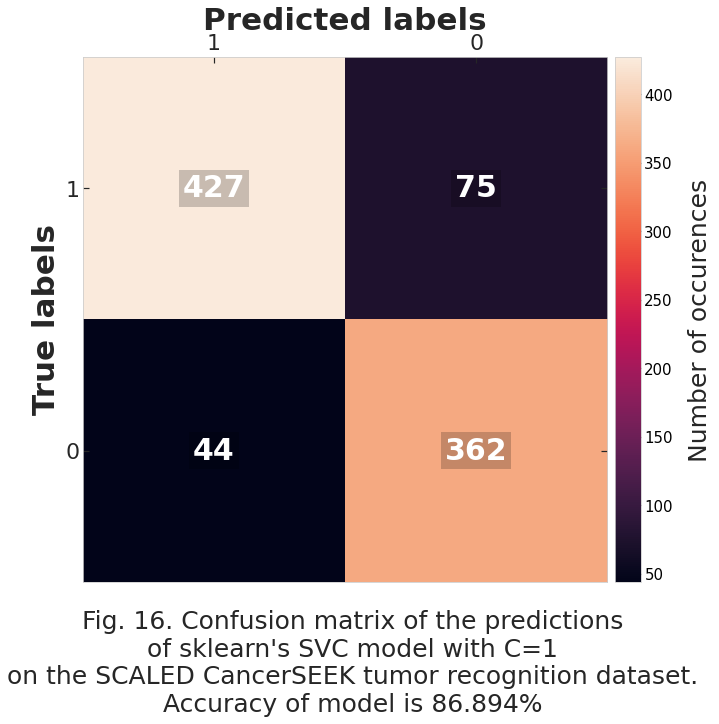

In [51]:
plot_confusion_matrix(conf_mat, y, labels=[1,0],
                      title=('Fig. 16. Confusion matrix of the predictions\nof sklearn\'s SVC model with C=1\n' +
                             'on the SCALED CancerSEEK tumor recognition dataset.\n' +
                             'Accuracy of model is {0:.3f}%'.format(accuracy)))

#### Create ROC curve

In [52]:
# Binarize labels
y = label_binarize(y, classes=np.unique(y))
y_test = np.array(y_test)[:, np.newaxis]
n_classes = y.shape[1]

In [53]:
y_score = svc.fit(X_train, y_train).decision_function(X_test)
if n_classes == 1:
    y_score = y_score[:, np.newaxis]

In [54]:
fpr_my, tpr_my, roc_auc_my = compute_roc(y_test=y_test,
                                         y_score=y_score, n_classes=n_classes)

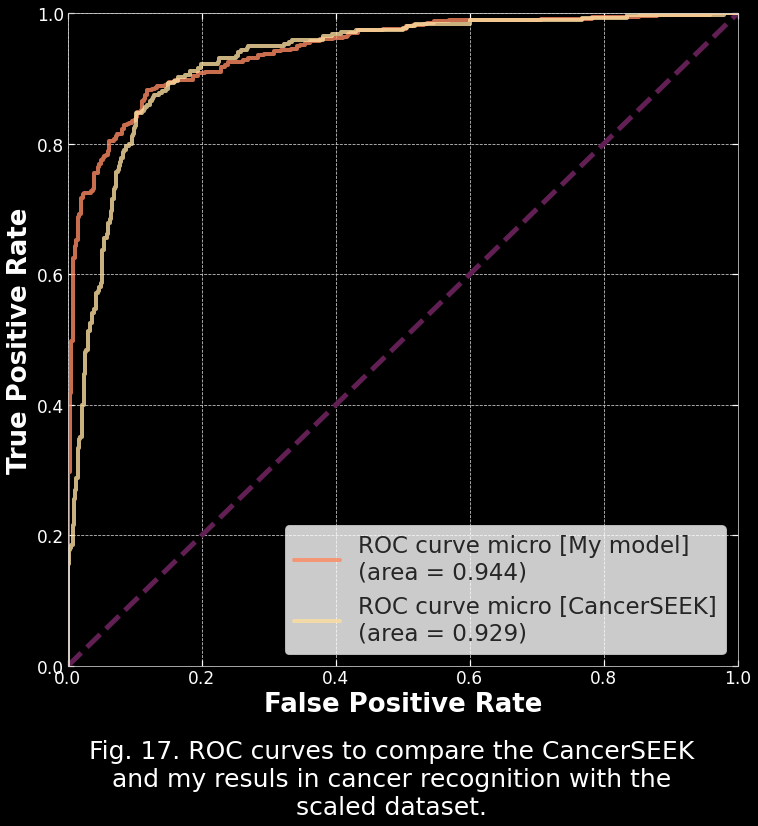

In [55]:
fig, axes = plt.subplots(figsize=(12, 12),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

axes.plot([0, 1], [0, 1], color=rocket_cmap(0.25), lw=5, linestyle='--')

# My model
axes.plot(fpr_my['micro'], tpr_my['micro'],
          label='ROC curve micro [My model]\n(area = %0.3f)' % roc_auc_my['micro'],
          color=cm.magma(0.75), lw=4, alpha=0.8)
# CancerSEEK
axes.plot(fpr_cS['micro'], tpr_cS['micro'],
          label='ROC curve micro [CancerSEEK]\n(area = %0.3f)' % roc_auc_cS['micro'],
          color=cm.magma(0.93), lw=4, alpha=0.8)

axes.set_xlim([0.0, 1.0])
axes.set_ylim([0.0, 1.0])

#ax.set_title('Tumor type : {0}'.format(tumor_dict[k+1]), fontsize=axistitlesize, fontweight='bold')
axes.set_xlabel('False Positive Rate', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('True Positive Rate', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

axes.legend(loc='lower right', fontsize=axislegendsize)

plt.suptitle('Fig. 17. ROC curves to compare the CancerSEEK\nand my resuls in cancer recognition with the\nscaled dataset.',
             fontsize=axistitlesize+5, y=0.04, color='white')
    
plt.show()

#### Conclusion

The dataset performs slightly better now, and it seems it even outperforms CancerSEEK in this case.

### 4./b. Try other kernels

In [56]:
# Full dataset
X = df[df.columns[2:-3]]
y = df[df.columns[-1]]
X = pd.DataFrame(scale_data(X), columns=X.columns)

# Train-test split as given by task description
X_train, X_test = X[::2], X[1::2]
y_train, y_test = y[::2], y[1::2]

In [57]:
# Binarize labels
y = label_binarize(y, classes=np.unique(y))
y_test = np.array(y_test)[:, np.newaxis]
n_classes = y.shape[1]

In [58]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
y_preds = {}
fprs = {}
tprs = {}
roc_aucs = {}
for kernel in kernels:
    # Define and fit the SVC model with C=1 to predict probabilites
    svc = SVC(kernel=kernel, probability=True)
    svc.fit(X_train, y_train);
    # Make predictions
    y_preds[kernel] = svc.predict(X_test)
    
    # Calculate scores between classes
    y_score = svc.fit(X_train, y_train).decision_function(X_test)
    y_score = y_score[:, np.newaxis]
    
    fprs[kernel], tprs[kernel], roc_aucs[kernel] = compute_roc(y_test=y_test,
                                                               y_score=y_score, n_classes=n_classes)

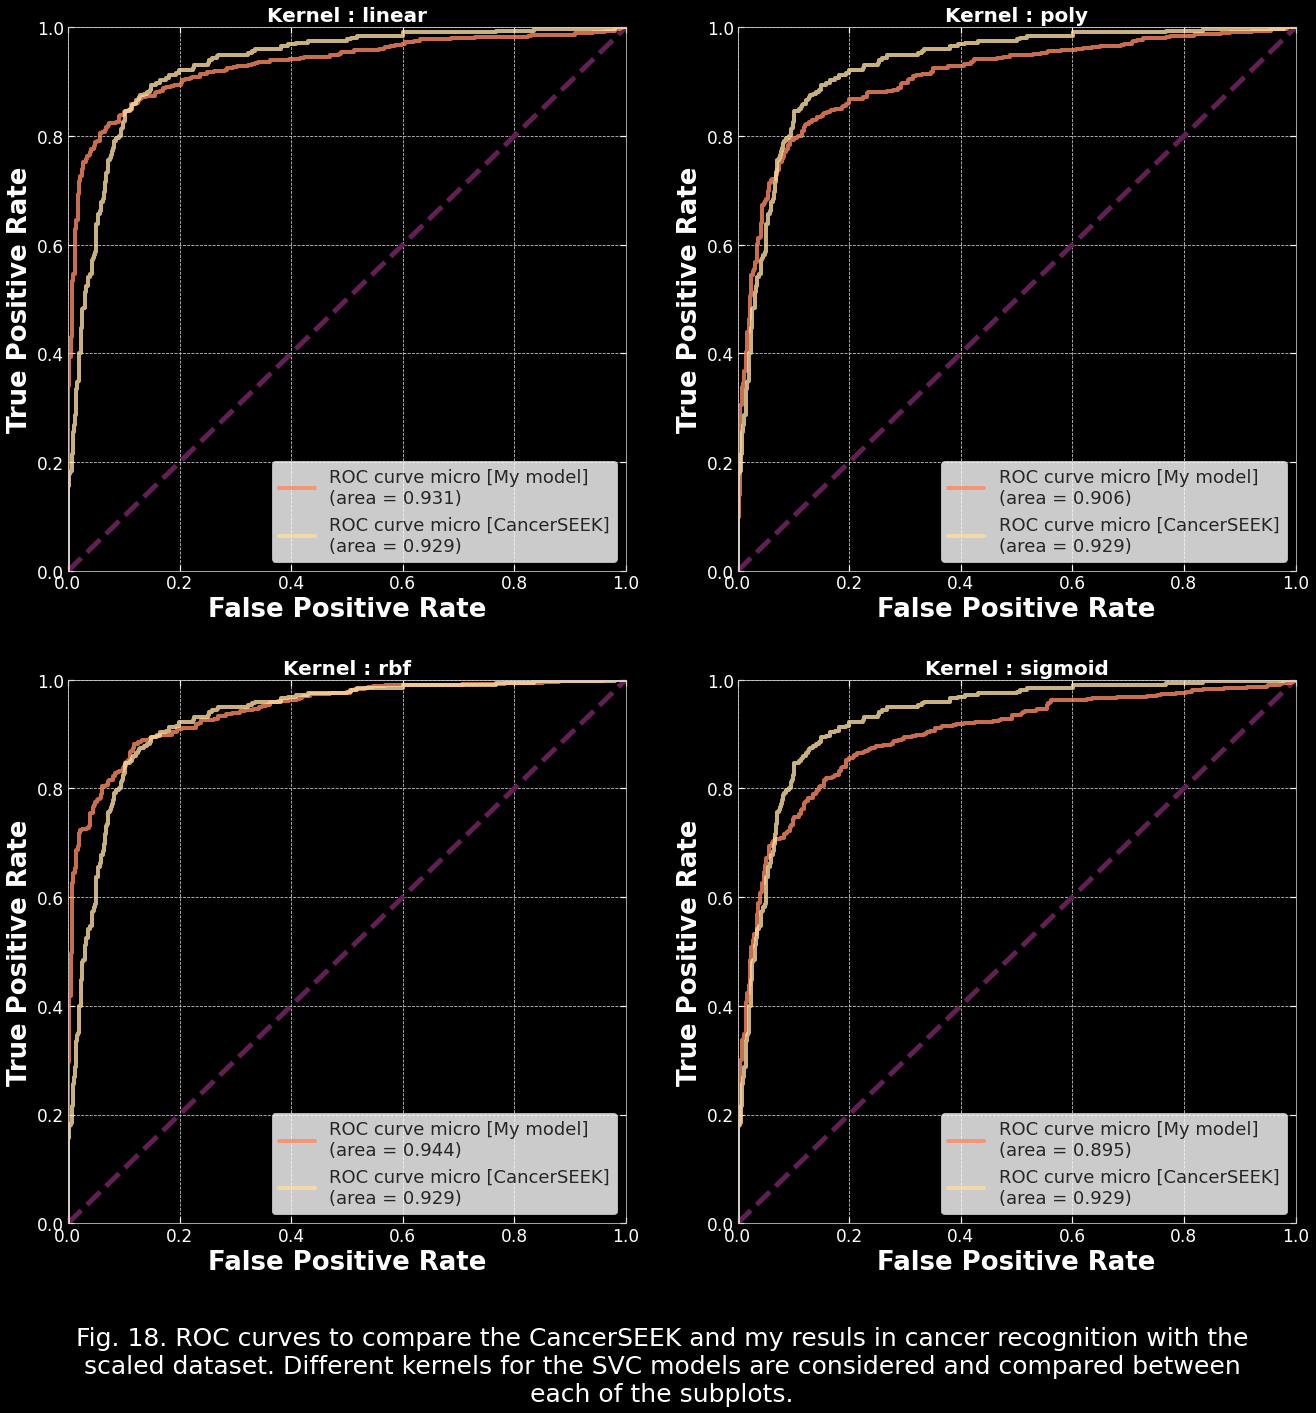

In [59]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*11, nrows*11),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

for i in range(nrows):
    for j in range(ncols):
        k = kernels[i * ncols + j]
        ax = axes[i][j]
        ax.plot([0, 1], [0, 1], color=rocket_cmap(0.25), lw=5, linestyle='--')

        # My model
        ax.plot(fprs[k]['micro'], tprs[k]['micro'],
                label='ROC curve micro [My model]\n(area = %0.3f)' % roc_aucs[k]['micro'],
                color=cm.magma(0.75), lw=4, alpha=0.8)
        # CancerSEEK
        ax.plot(fpr_cS['micro'], tpr_cS['micro'],
                label='ROC curve micro [CancerSEEK]\n(area = %0.3f)' % roc_auc_cS['micro'],
                color=cm.magma(0.93), lw=4, alpha=0.8)

        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.0])

        ax.set_title('Kernel : {0}'.format(kernels[i*ncols + j]), fontsize=axistitlesize, fontweight='bold', color='white')
        ax.set_xlabel('False Positive Rate', fontsize=axislabelsize, fontweight='bold', color='white')
        ax.set_ylabel('True Positive Rate', fontsize=axislabelsize, fontweight='bold', color='white')
        ax.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

        ax.legend(loc='lower right', fontsize=axislegendsize-5)

plt.suptitle('Fig. 18. ROC curves to compare the CancerSEEK and my resuls in cancer recognition with the\n' +
             'scaled dataset. Different kernels for the SVC models are considered and compared between\n' +
             'each of the subplots.',
             fontsize=axistitlesize+5, y=0.06, color='white')
    
plt.show()

## 5.) Split the data randomly to 3 parts: 70% train, 15% validation, 15% test data and tune hyperparameters

- prepare data as described in the title, then scale all input based on the training set
- select your best performing SVC model from the previous exercise
- check the behaviour of the SVC by modifying at least 3 of its hyperparameters (C, gamma, ...) and plot the AUC value vs the modified parameter (logscale may be better for visualization)
- create plots (at least 2) that shows the train, val and test accuracy based on a given hyperparameter's different values. Is it a good idea to rely on validation data when tuning hyperparameter in this case?
- select the best settings, train the SVC and evaluate with reference to CancerSEEK results with the ROC curve and the confusion matrix (match your results with CancerSEEK's results on the same dataset splitting)

In [60]:
from sklearn.model_selection import train_test_split

### 5./a. Preprocess dataset as given in title

In [61]:
# Full dataset
X = df[df.columns[2:-3]]
y = df[df.columns[-1]]

train_c = 0.7
test_c = 0.15
valid_c = 0.15
assert train_c + test_c + valid_c == 1, "Train+Test+Validation should cover the whole dataset!"
random_state = None

# Binarize labels
y_t = label_binarize(y, classes=np.unique(y))
n_classes = y_t.shape[1]

# Split dataset
X_train, X_test, y_train, y_test \
    = train_test_split(X, y, test_size=test_c, random_state=random_state)
X_train, X_val, y_train, y_val \
    = train_test_split(X_train, y_train, test_size=valid_c / (train_c + test_c), random_state=random_state)

### 5./b. Hyperparameter tuning

Possible parameters for the `sklearn.svm.SVC()` class:

**`C`**  
Default : `1.0`
> Scale of regularization. Can be used for any kernels, must be strictly positive.  
> **FIRST HYPERPARAMETER TO MODIFY**

**`kernel`**  
Default : `'rbf'`
> Specifies the kernel type to be used in the algorithm, can be callable. Best kernel should be selected according
to the task, using the results from the previous task.  
*CAN'T BE USED FOR HYPERPARAMETER TUNING HERE*

**`degree`**  
Default : `3`
> Degree of the polynomial kernel function in case of `kernel='poly'` .  
> *CAN'T BE USED FOR HYPERPARAMETER TUNING HERE*

**`gamma`**  
Default : `'scale'`
> Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.  
> **SECOND HYPERPARAMETER TO MODIFY**

**`coef0`**  
Default : `0.0`
>
> *CAN BE USED FOR HP TUNING, BUT I WON'T NOW*

**`shrinking`**  
Default : `True`
> Whether to use the shrinking heuristic.  
> **THIRD HYPERPARAMETER TO MODIFY**

**`probability`**  
Default : `False`
> *CAN'T BE USED FOR HYPERPARAMETER TUNING HERE*

**`tol`**  
Default : `0.001`
> Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'.
> *CAN'T BE USED FOR HYPERPARAMETER TUNING HERE*

**`cache_size`**  
Default : `200`
> 
> *CAN'T BE USED FOR HYPERPARAMETER TUNING HERE*

**`class_weight`**  
Default : `None`
> 
> *CAN'T BE USED FOR HYPERPARAMETER TUNING HERE*

**`verbose`**  
Default : `False`
> 
> *CAN'T BE USED FOR HYPERPARAMETER TUNING HERE*

**`max_iter`**  
Default : `-1`
> 
> *CAN'T BE USED FOR HYPERPARAMETER TUNING HERE*

**`decision_function_shape`**
Default : `'ovr'`
> 
> *CAN'T BE USED FOR HYPERPARAMETER TUNING HERE*

**`break_ties`**  
Default : `False` 
> 
> *CAN'T BE USED FOR HYPERPARAMETER TUNING HERE*

**`random_state`**  
Default : `None`
> Set a random seed for the algorithm for reproducibility.  
> *CAN'T BE USED FOR HYPERPARAMETER TUNING HERE*

In [62]:
# Hyperparameters
C_vals = np.linspace(1, 1000, 100)
kernel = 'rbf'
gammas = ['scale', 'auto']
shrinkings = [True, False]
random_state = None

In [64]:
accuracies = {}
fprs = {}
tprs = {}
roc_aucs = {}

for gamma in gammas:
    for shrinking in shrinkings:
        key = (gamma, shrinking)
        acc = []
        #fp = np.zeros(len(C_vals))
        #tp = np.zeros(len(C_vals))
        roc = np.zeros(len(C_vals))
        for i, C in enumerate(C_vals):
            svc = SVC(
                        C=C,
                        kernel=kernel,
                        degree=3,
                        gamma=gamma,
                        coef0=0.0,
                        shrinking=shrinking,
                        probability=False,
                        tol=0.001,
                        cache_size=200,
                        class_weight=None,
                        verbose=False,
                        max_iter=-1,
                        decision_function_shape='ovr',
                        break_ties=False,
                        random_state=random_state
                     )
            svc.fit(X_train, y_train)
            # Make predictions for all sets (train, test, valid)
            y_pred_train = svc.predict(X_train)
            y_pred_test = svc.predict(X_test)
            y_pred_val = svc.predict(X_val)
            # Calculate and accuracy metric
            acc.append({
                    'train' : accuracy_metric(y_test=y_train, y_pred=y_pred_train),
                    'test' : accuracy_metric(y_test=y_test, y_pred=y_pred_test),
                    'val' : accuracy_metric(y_test=y_val, y_pred=y_pred_val)
            })

            # Calculate scores between classes for the test case
            y_score = svc.fit(X_train, y_train).decision_function(X_test)
            y_score = y_score[:, np.newaxis]
            # Get ROC curve for test data
            _, _, r = compute_roc(y_test=np.array(y_test)[:, np.newaxis],
                                  y_score=y_score, n_classes=n_classes)
            roc[i] = r['micro']
        # Add values to corresponding hyperparameter sets
        roc_aucs[key] = roc
        accuracies[key] = acc

### Some notes

Modifying the parameters above, we'll have 4 different sets of hypereparameters, each of them having the same series for `C` values in the following order:
1. gamma: `'scale'`; shrinking: `True`  
2. gamma: `'scale'`; shrinking: `False`  
3. gamma: `'auto'`; shrinking: `True`  
4. gamma: `'auto'`; shrinking: `False`

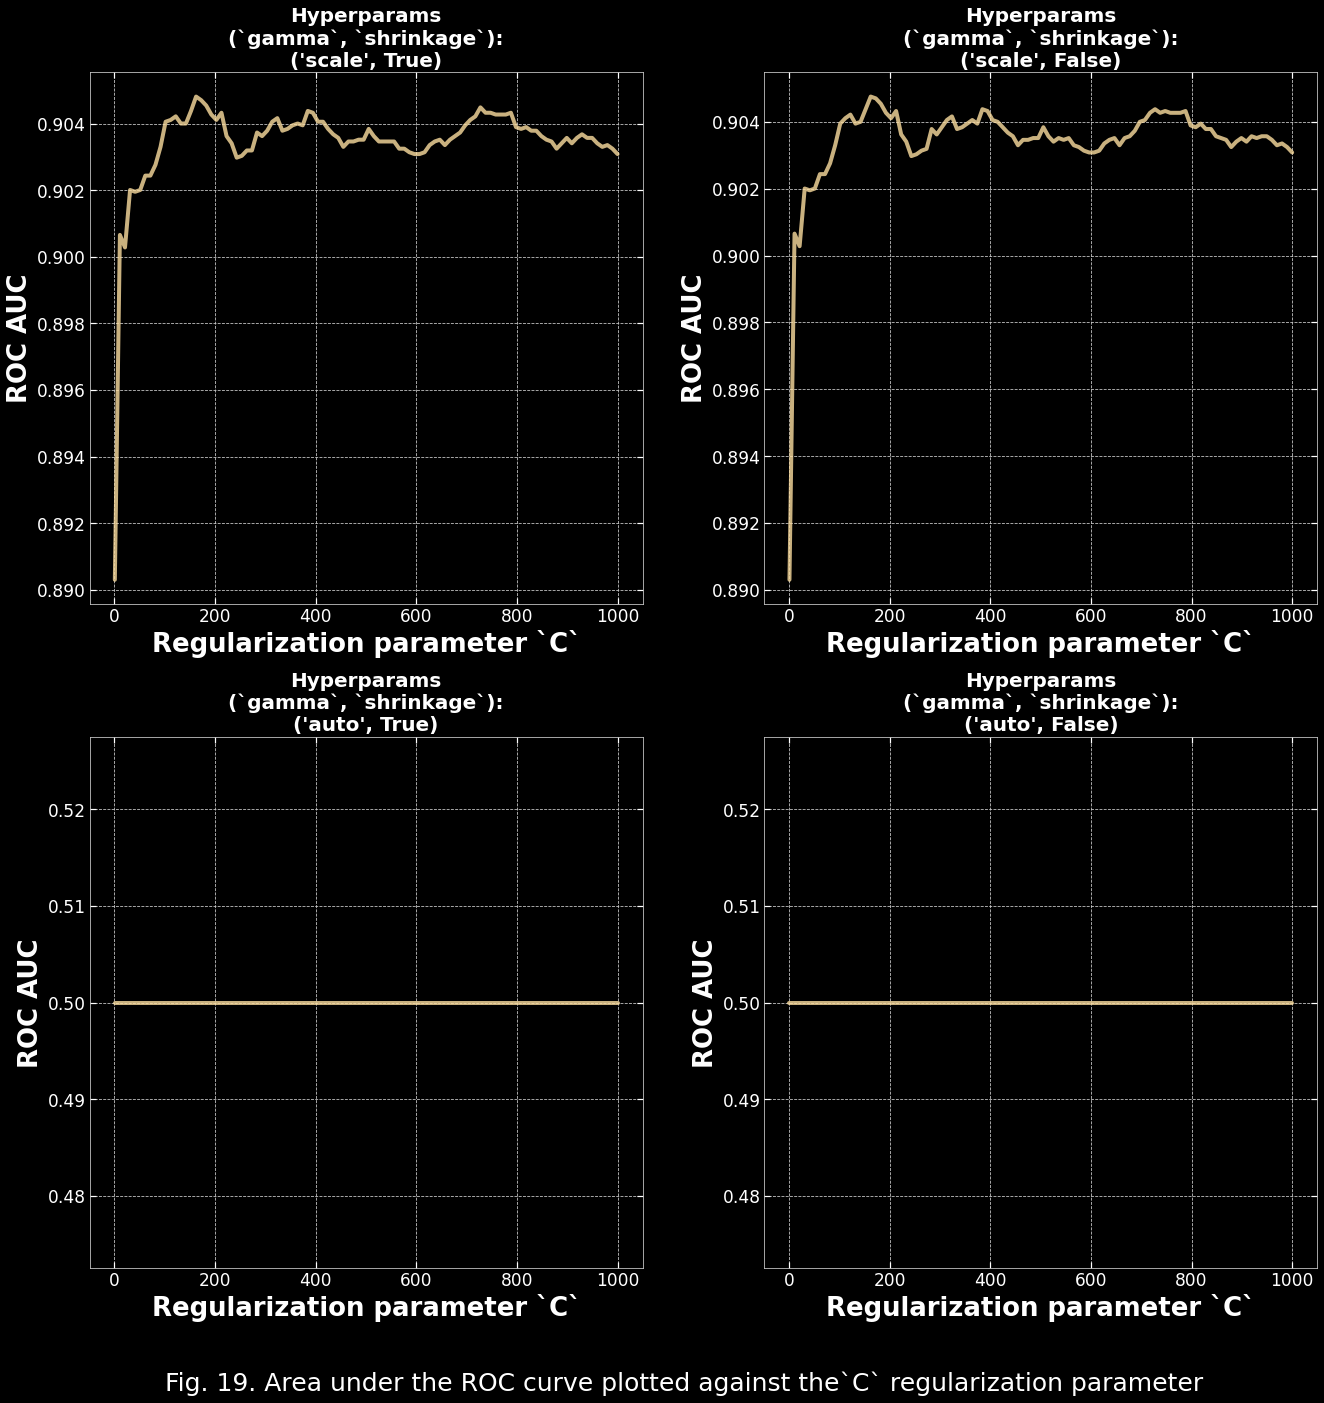

In [65]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*11, nrows*11),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})
fig.subplots_adjust(hspace=0.25, wspace=0.22)

for i, (keys, values) in enumerate(roc_aucs.items()):
    m = i // nrows
    n = i % ncols
    ax = axes[m][n]
    
    ax.plot(C_vals, values,
            color=cm.magma(0.93), lw=4, alpha=0.8)
    
    ax.set_title('Hyperparams\n(`gamma`, `shrinkage`):\n{0}'.format(keys), fontsize=axistitlesize, fontweight='bold', color='white')
    ax.set_xlabel('Regularization parameter `C`', fontsize=axislabelsize, fontweight='bold', color='white')
    ax.set_ylabel('ROC AUC', fontsize=axislabelsize, fontweight='bold', color='white')
    ax.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

plt.suptitle('Fig. 19. Area under the ROC curve plotted against the`C` regularization parameter',
             fontsize=axistitlesize+5, y=0.06, color='white')

plt.show()

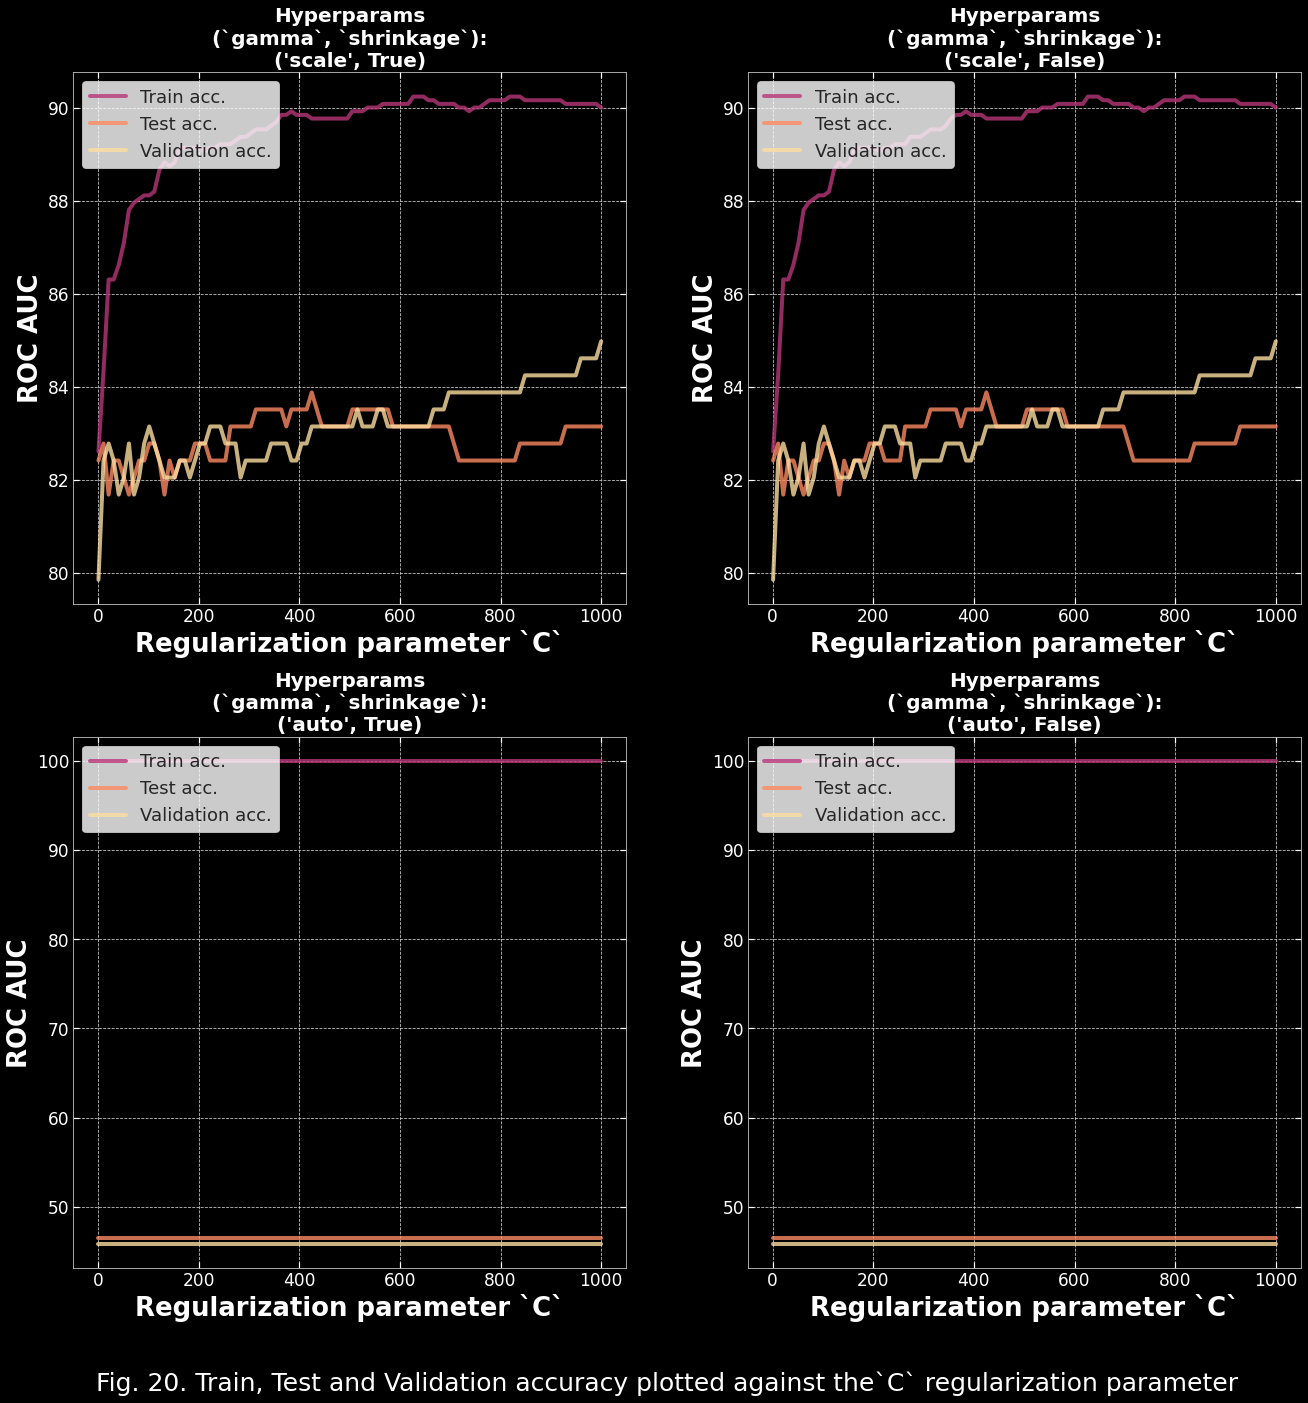

In [66]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*11, nrows*11),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})
fig.subplots_adjust(hspace=0.25, wspace=0.22)

for i, (keys, values) in enumerate(accuracies.items()):
    m = i // nrows
    n = i % ncols
    ax = axes[m][n]
    
    
    ax.plot(C_vals, [d['train'] for d in values], label='Train acc.',
            color=cm.magma(0.5), lw=4, alpha=0.8)
    ax.plot(C_vals, [d['test'] for d in values], label='Test acc.',
            color=cm.magma(0.75), lw=4, alpha=0.8)
    ax.plot(C_vals, [d['val'] for d in values], label='Validation acc.',
            color=cm.magma(0.93), lw=4, alpha=0.8)
    
    ax.set_title('Hyperparams\n(`gamma`, `shrinkage`):\n{0}'.format(keys), fontsize=axistitlesize, fontweight='bold', color='white')
    ax.set_xlabel('Regularization parameter `C`', fontsize=axislabelsize, fontweight='bold', color='white')
    ax.set_ylabel('ROC AUC', fontsize=axislabelsize, fontweight='bold', color='white')
    ax.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

    ax.legend(loc='upper left', fontsize=axislegendsize-5)
    
plt.suptitle('Fig. 20. Train, Test and Validation accuracy plotted against the`C` regularization parameter',
             fontsize=axistitlesize+5, y=0.06, color='white')

plt.show()

### Note on the hyperparameters

In the case of the `gamma` parameter set to `auto` the model doesn't learn anything. It is an interesting thing to note for sure.

### Note on the test-validation accuracy

The validation dataset functions as a smaller test set in this case, and isn't used to explicitly regularize the parameters of the trained model. Thus it simply reduce the number of our train/test data and worsens our model. Using CV would be much more sensible in this case.

### 5./c. Select best model and compare it to CancerSEEK

In [67]:
# Full dataset
X = df[df.columns[2:-3]]
y = df[df.columns[-1]]

test_c = 0.15
random_state = None

# Binarize labels
y_t = label_binarize(y, classes=np.unique(y))
n_classes = y_t.shape[1]

# Split dataset
X_train, X_test, y_train, y_test \
    = train_test_split(X, y, test_size=test_c, random_state=random_state)

# Convert test data to correct shape
y_test = np.array(y_test)[:, np.newaxis]

In [68]:
# Best model hyperparams
gamma = 'scale'
shrinking = True

# Calcualte best C
roc_values = list(roc_aucs.values())
max_local = [np.max(v) for v in roc_values]
max_global = np.max(max_local)
max_global_loc = max_local.index(max_global)
C = C_vals[np.where(roc_values[max_global_loc] == max_global)][0]

In [69]:
# Define and fit the SVC model with C=1
svc = SVC(C=C, gamma=gamma, shrinking=shrinking)
svc.fit(X_train, y_train);
# Make predictions
y_pred = svc.predict(X_test)
# Calculate and accuracy metric and the confusion matrix
accuracy = accuracy_metric(y_test=y_test, y_pred=y_pred)
conf_mat = confusion_matrix(y_test, y_pred, labels=[1,0])

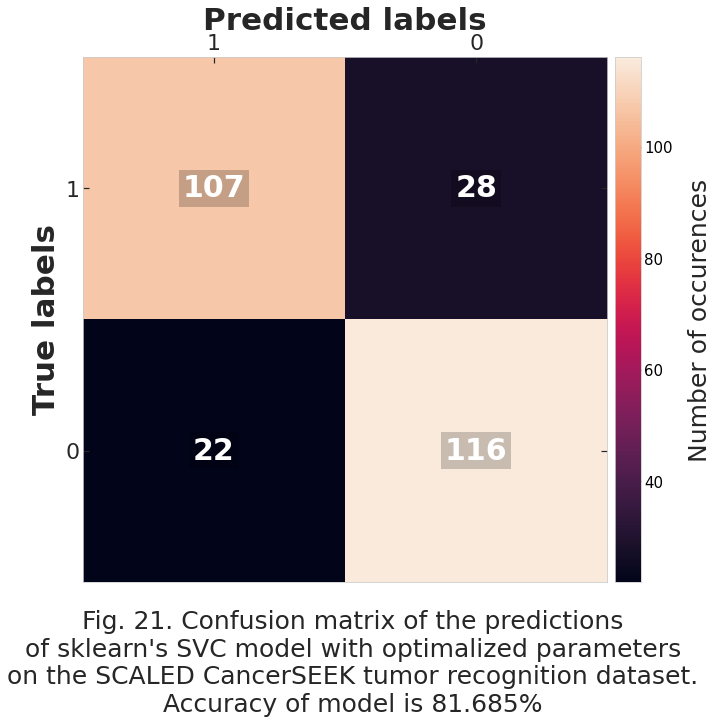

In [70]:
plot_confusion_matrix(conf_mat, y, labels=[1,0],
                      title=('Fig. 21. Confusion matrix of the predictions\n' +
                             'of sklearn\'s SVC model with optimalized parameters\n' +
                             'on the SCALED CancerSEEK tumor recognition dataset.\n' +
                             'Accuracy of model is {0:.3f}%'.format(accuracy)))

#### Create ROC curve

In [71]:
y_score = svc.fit(X_train, y_train).decision_function(X_test)
if n_classes == 1:
    y_score = y_score[:, np.newaxis]

In [72]:
fpr_my, tpr_my, roc_auc_my = compute_roc(y_test=y_test,
                                         y_score=y_score, n_classes=n_classes)

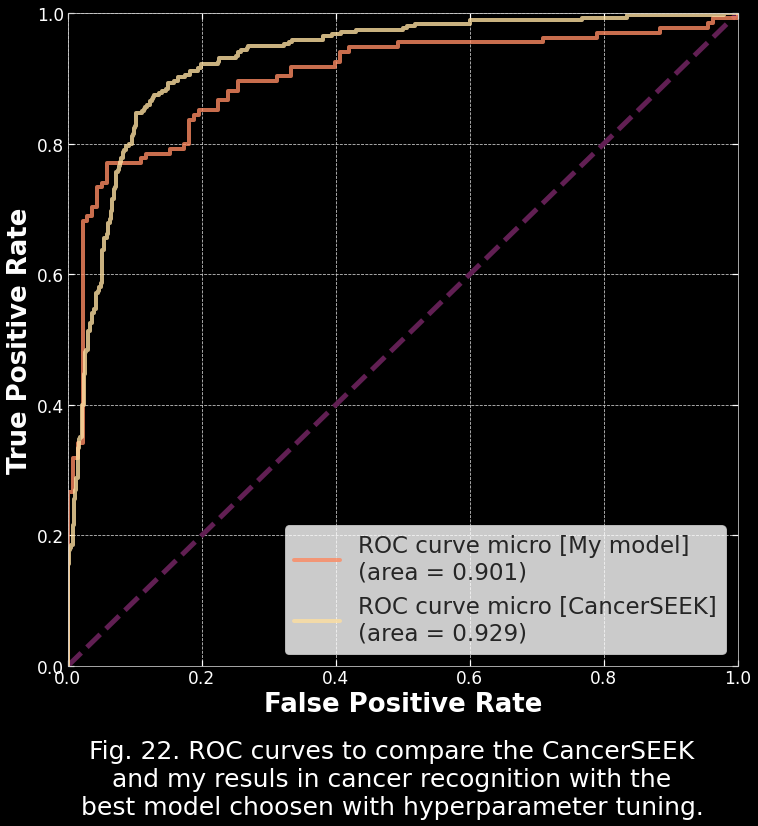

In [73]:
fig, axes = plt.subplots(figsize=(12, 12),
                         facecolor='black', subplot_kw={'facecolor' : 'black'})

axes.plot([0, 1], [0, 1], color=rocket_cmap(0.25), lw=5, linestyle='--')

# My model
axes.plot(fpr_my['micro'], tpr_my['micro'],
          label='ROC curve micro [My model]\n(area = %0.3f)' % roc_auc_my['micro'],
          color=cm.magma(0.75), lw=4, alpha=0.8)
# CancerSEEK
axes.plot(fpr_cS['micro'], tpr_cS['micro'],
          label='ROC curve micro [CancerSEEK]\n(area = %0.3f)' % roc_auc_cS['micro'],
          color=cm.magma(0.93), lw=4, alpha=0.8)

axes.set_xlim([0.0, 1.0])
axes.set_ylim([0.0, 1.0])

#ax.set_title('Tumor type : {0}'.format(tumor_dict[k+1]), fontsize=axistitlesize, fontweight='bold')
axes.set_xlabel('False Positive Rate', fontsize=axislabelsize, fontweight='bold', color='white')
axes.set_ylabel('True Positive Rate', fontsize=axislabelsize, fontweight='bold', color='white')
axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')

axes.legend(loc='lower right', fontsize=axislegendsize)

plt.suptitle('Fig. 22. ROC curves to compare the CancerSEEK\n' +
             'and my resuls in cancer recognition with the\n' +
             'best model choosen with hyperparameter tuning.',
             fontsize=axistitlesize+5, y=0.04, color='white')
    
plt.show()

### Hints:
 - On total you can get 10 points for fully completing all tasks.
 - Decorate your notebook with, questions, explanation etc, make it self contained and understandable!
 - Comments you code when necessary
 - Write functions for repetitive tasks!
 - Use the pandas package for data loading and handling
 - Use matplotlib and seaborn for plotting or bokeh and plotly for interactive investigation
 - Use the scikit learn package for almost everything
 - Use for loops only if it is really necessary!
 - Code sharing is not allowed between student! Sharing code will result in zero points.
 - If you use code found on web, it is OK, but, make its source clear! 